<a href="https://colab.research.google.com/github/borisbolliet/ScatteringTransformTutorials/blob/main/learning_scattering_transforms_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Wavelet Scattering Transforms

## Audio processing



In [5]:
!pip install kymatio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 2.7 MB/s eta 0:00:00


In [10]:
!pip install scikit-cuda cupy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 67.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cupy
  Running setup.py clean for cupy
  Created wheel for pycuda: filename=pycuda-2024.1.2-cp310-cp310-linux_x86_64.whl size=660546 sha256=839756ebd268c49d2e23

In [1]:
import numpy as np
import os
import scipy.io.wavfile

In [2]:
import matplotlib.pyplot as plt

### Scattering transform on spoken digit

In [3]:

from kymatio.datasets import fetch_fsdd

Let us fetch the dataset

In [4]:
info_dataset = fetch_fsdd(verbose=True)

Cloning git repository at  https://github.com/Jakobovski/free-spoken-digit-dataset.git


In [49]:
file_path = os.path.join(info_dataset['path_dataset'], sorted(info_dataset['files'])[0])
_, x = scipy.io.wavfile.read(file_path)

The data file is at:

In [50]:
file_path

'/root/kymatio_datasets/fsdd/free-spoken-digit-dataset/recordings/0_george_0.wav'

It is a recording of a person saying the word "zero"

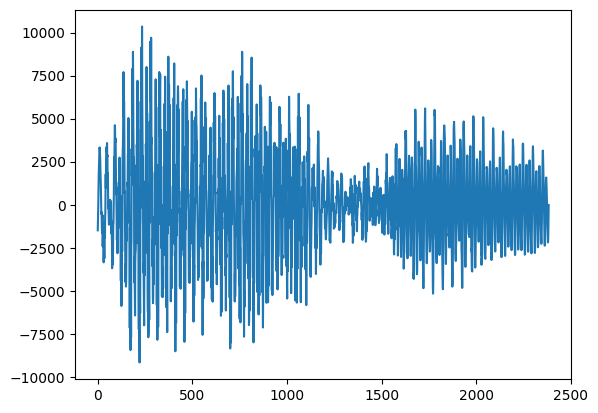

In [51]:
# prompt: plot x

plt.plot(x)
plt.show()

In the plot above we see the time series corresponding to this signal.

Let us apply a max normalization

In [52]:
#x = x / np.max(np.abs(x))

# or with torch
import torch

In [53]:
x = torch.tensor(x)  # Convert to PyTorch tensor
x = x / torch.max(torch.abs(x))

The normalized signal now looks like

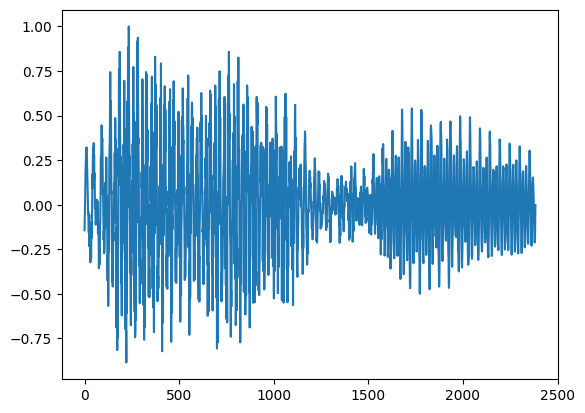

In [54]:
plt.plot(x)
plt.show()

Let us now setup the scattering transform.

In [55]:
from kymatio.torch import Scattering1D

In [56]:
T = x.shape[-1]
J = 6
Q = 16

In [57]:
x.shape

torch.Size([2384])

$T$ is the number of time samples of the signal, here 2384.

$J$ sets the averaging scale specified as $2^J$, so for $J=6$ the averaging scale is 64.

$Q$ sets the number of wavelets per frequency octave. Here we have 16 wavelets per octave, which corresponds to a frequency resolution of 1/16 octaves.

The object that computes the scattering transform is then constructed via

In [58]:
scattering = Scattering1D(J, T, Q)

Let us now compute the scattering transform of the signal.

In [59]:
Sx = scattering(x)

The result is a tensor of size $(C,\hat{T})$ where $C$ is the number of scattering coefficients.  And $\hat{T}$ is the number of time samples after averaging due to the transform (hence smaller than $T$).

*Question: can i control C?*

In [60]:
Sx.shape

torch.Size([222, 37])

In this case, with $J=6$ the averaging scale is 64 and we should indeed be left with around 37 time points.

In [61]:
2384/64

37.25

The number of wavelets per octave (i.e., $Q$) is what determines how many coefficients (i.e., how many wavelets) we end up with.

This depends on the frequency content of the signal.

The metadata is stored in `scaterring.meta`

In [62]:
meta = scattering.meta()

In [63]:
meta['order']

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [64]:
len(meta['order']),len(meta['order'][meta['order']==0]),len(meta['order'][meta['order']==1]),len(meta['order'][meta['order']==2])

(222, 1, 63, 158)

As we see, we have 3 orders, at zeroth order we have one coefficient, at first order 63 and at second order 158 coefficients, for a total of 222 coefficients.


The transform of a 1D signal always has 3 orders. It is written as

$$
S_Jx =[S_Jx^{(0)},S_Jx^{(1)},S_Jx^{(2)}]
$$

where

$$
S_J^{(0)}x(t) = x \star \phi_J
$$

with $\star$ denoting the convolution, and $\phi_J$ a real low pass filter centered at the zero frequency.

The first order transform is given by

$$
S_J^{(1)}x(t,\lambda) = |x \star \psi^{(1)}_\lambda| \star \phi_J
$$

where $\psi^{(1)}_\lambda(t)$ is an analytic wavelet with center frequency $\lambda$. This wavelet is fixed.

At the second order we have

$$
S_J^{(2)}x(t,\lambda,\mu) = ||x \star \psi^{(1)}_\lambda|\star\psi_{\mu}^{(2)}| \star \phi_J
$$

where $\psi^{(2)}_\mu(t)$ is another analytic wavelet with center frequency $\mu$.


The reason why we don;t need to go beyond second order here, is that for short duration signals most of the information is contained (most of the energy of the signal is captured by) the second order. See [Anden & Mallat (2014)](https://arxiv.org/pdf/1304.6763).

Examples of analytical wavelets are Morlet wavelets, and the low-pass ffilter is from a Gaussian (see Figure 3 of [Anden & Mallat (2014)](https://arxiv.org/pdf/1304.6763)).

Let us collect the indices of the coefficients at different order.

In [65]:
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

Let us now plot the scattering coefficients at different orders.

At zeroth order we have only one coefficient.

In [69]:
Sx[order0]

tensor([[ 9.5771e-03,  6.0963e-03,  2.5752e-03,  6.8725e-04,  6.8717e-05,
         -6.1018e-05, -7.8642e-05, -8.0119e-05, -8.0078e-05, -7.9791e-05,
         -7.9764e-05, -8.0529e-05, -8.1710e-05, -8.2341e-05, -8.2052e-05,
         -8.1251e-05, -8.0546e-05, -8.0406e-05, -8.0877e-05, -8.1401e-05,
         -8.1556e-05, -8.1446e-05, -8.1119e-05, -8.0608e-05, -7.9999e-05,
         -7.9295e-05, -7.8810e-05, -7.8845e-05, -7.9131e-05, -7.9511e-05,
         -8.0774e-05, -9.0231e-05, -1.5579e-04, -4.6500e-04, -1.4009e-03,
         -3.1289e-03, -4.8133e-03]])

Text(0.5, 1.0, 'Zeroth-order scattering')

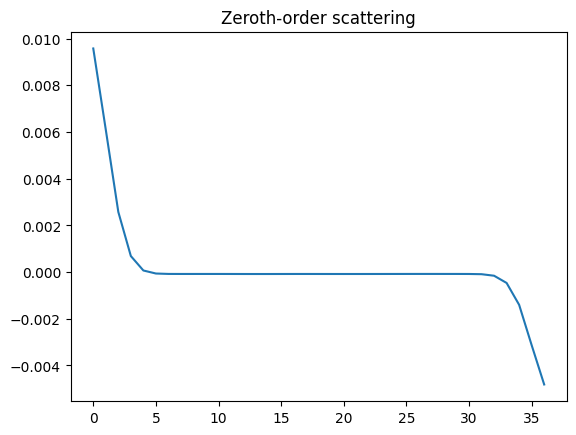

In [70]:
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')

This shows how the zeroth order coefficient evolves in the time domain.

We can do the same for first order coefficient.

In [72]:
Sx[order1].shape

torch.Size([63, 37])

Text(0.5, 0, 'downsampled time values')

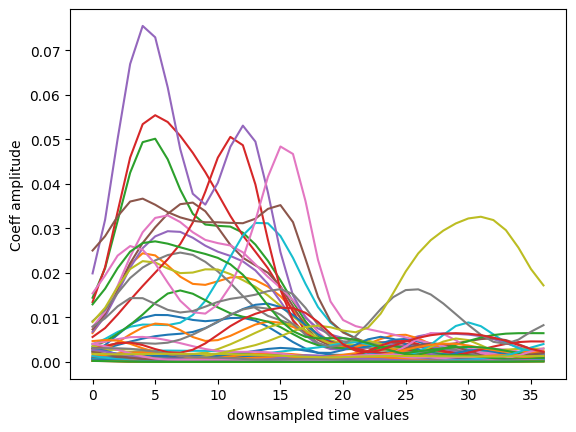

In [77]:
import pandas as pd
df = pd.DataFrame(Sx[order1].numpy().T)

df.plot(legend=False)
plt.ylabel("Coeff amplitude")
plt.xlabel("downsampled time values")

Finally, let us look at the second order coefficients

Text(0.5, 0, 'downsampled time values')

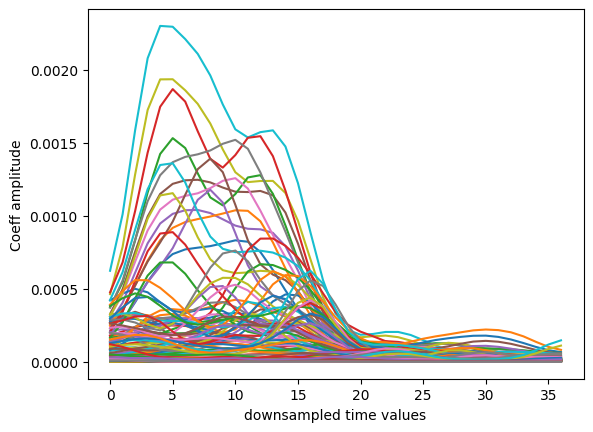

In [78]:
import pandas as pd
df = pd.DataFrame(Sx[order2].numpy().T)

df.plot(legend=False)
plt.ylabel("Coeff amplitude")
plt.xlabel("downsampled time values")

### Classification of spoken digits


Here, we learn how useful scattering representations can be for classification of spoken digits.

In [79]:
from torch.nn import Linear, NLLLoss, LogSoftmax, Sequential
from torch.optim import Adam

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [82]:
device

device(type='cuda')

In [83]:
use_cuda

True

In [84]:
torch.manual_seed(42)

Here we set-up our scattering transform pipeline differently.

We use $T=2^{13}$

In [85]:
T=2**13
T

8192

We also set $J=8$ for our averaging scale and Q=12 for number of wavelets per octave.

In [86]:
J = 8
Q = 12

In [110]:
T/2**J

32.0

This will give us 32 downsampled time points.

Also, we set a small number to avoid singular errors in logs.

In [87]:
log_eps=1e-16

In [91]:
path_dataset= info_dataset['path_dataset']

In [93]:
files=info_dataset['files']

Let us instantiate some tensor to hold the signals.

In [94]:
x_all = torch.zeros(len(files), T, dtype=torch.float32, device=device)
y_all = torch.zeros(len(files), dtype=torch.int64, device=device)
subset = torch.zeros(len(files), dtype=torch.int64, device=device)

We now create a test and train set.

In [96]:
for k, f in enumerate(files):
    basename = f.split('.')[0]

    # Get label (0-9) of recording.
    y = int(basename.split('_')[0])

    # Index larger than 5 gets assigned to training set.
    if int(basename.split('_')[2]) >= 5:
        subset[k] = 0
    else:
        subset[k] = 1

    # Load the audio signal and normalize it.
    _, x = scipy.io.wavfile.read(os.path.join(path_dataset, f))
    x = np.asarray(x, dtype='float')
    x /= np.max(np.abs(x))

    # Convert from NumPy array to PyTorch Tensor.
    x = torch.from_numpy(x).to(device)

    # If it's too long, truncate it.
    if x.numel() > T:
        x = x[:T]

    # If it's too short, zero-pad it.
    start = (T - x.numel()) // 2

    x_all[k,start:start + x.numel()] = x
    y_all[k] = y

Thus, `subset=0` corresponds to our training set (all files with indices larger than 4) and the first 4 files in each basename are for testing and have `subset=1`

In [100]:
scattering = Scattering1D(J, T, Q).to(device) # the to device is important for GPU compatibility

Let us transform the whole dataset.

This dataset has a batch size of 3000. There are 3000 signals to transform.

In [104]:
x_all.shape

torch.Size([3000, 8192])

In [106]:
Sx_all = scattering(x_all) # can also use  scattering.forward(x_all)

In [109]:
Sx_all.shape

torch.Size([3000, 337, 32])

Our batch is now over 32 time points and each transform has a hierarchy of 3337 coefficients (i.e., waevelets).

We remove the zeroth order coefficients as they dont carry useful information.

In [111]:
Sx_all = Sx_all[:,1:,:]

Let us take log as a normalizing step.

In [112]:
Sx_all = torch.log(torch.abs(Sx_all) + log_eps)

In [113]:
Sx_all.shape

torch.Size([3000, 336, 32])

And average along the time dimension to get a time-shift invariant representation.

In [114]:
Sx_all = torch.mean(Sx_all, dim=-1)

In [115]:
Sx_all.shape

torch.Size([3000, 336])

We now have 336 numbers per signal in our batch to chartacterize each (instead of 8192!).

We move on and train a logistic regression classifier. The output of this classifier (based on the logistic function, i.e., sigmoid) is a probablity for belonging to a class.

Extract the training data:

In [118]:
Sx_train, y_train = Sx_all[subset == 0], y_all[subset == 0]

In [129]:
y_train, y_train.shape

(tensor([1, 6, 4,  ..., 7, 4, 2], device='cuda:0'), torch.Size([2700]))

Remenber, our labels in `y_train` are just the number being spoken.

Standardized the data, to mean zero and unit variance:

In [120]:
mu_train = Sx_train.mean(dim=0)
std_train = Sx_train.std(dim=0)
Sx_train = (Sx_train - mu_train) / std_train

In [121]:
num_input = Sx_train.shape[-1]
num_classes = y_train.cpu().unique().numel()
model = Sequential(Linear(num_input, num_classes), LogSoftmax(dim=1))
optimizer = Adam(model.parameters())
criterion = NLLLoss()

In [122]:
model = model.to(device)
criterion = criterion.to(device)

In [123]:
# Number of signals to use in each gradient descent step (batch).
batch_size = 32
# Number of epochs.
num_epochs = 50
# Learning rate for Adam.
lr = 1e-4

In [125]:
nsamples = Sx_train.shape[0]
nbatches = nsamples // batch_size

In [130]:
nbatches,nsamples

(84, 2700)

In [131]:
for e in range(num_epochs):
    # Randomly permute the data. If necessary, transfer the permutation to the
    # GPU.
    perm = torch.randperm(nsamples, device=device)

    # For each batch, calculate the gradient with respect to the loss and take
    # one step.
    for i in range(nbatches):
        idx = perm[i * batch_size : (i+1) * batch_size]
        model.zero_grad()
        resp = model.forward(Sx_train[idx])
        loss = criterion(resp, y_train[idx])
        loss.backward()
        optimizer.step()

    # Calculate the response of the training data at the end of this epoch and
    # the average loss.
    resp = model.forward(Sx_train)
    avg_loss = criterion(resp, y_train)

    # Try predicting the classes of the signals in the training set and compute
    # the accuracy.
    y_hat = resp.argmax(dim=1)
    accuracy = (y_train == y_hat).float().mean()

    print('Epoch {}, average loss = {:1.3f}, accuracy = {:1.3f}'.format(
        e, avg_loss, accuracy))

Epoch 0, average loss = 1.336, accuracy = 0.638
Epoch 1, average loss = 1.067, accuracy = 0.729
Epoch 2, average loss = 0.915, accuracy = 0.770
Epoch 3, average loss = 0.809, accuracy = 0.812
Epoch 4, average loss = 0.736, accuracy = 0.827
Epoch 5, average loss = 0.694, accuracy = 0.828
Epoch 6, average loss = 0.646, accuracy = 0.839
Epoch 7, average loss = 0.597, accuracy = 0.845
Epoch 8, average loss = 0.568, accuracy = 0.850
Epoch 9, average loss = 0.540, accuracy = 0.861
Epoch 10, average loss = 0.516, accuracy = 0.868
Epoch 11, average loss = 0.503, accuracy = 0.874
Epoch 12, average loss = 0.486, accuracy = 0.871
Epoch 13, average loss = 0.497, accuracy = 0.857
Epoch 14, average loss = 0.456, accuracy = 0.880
Epoch 15, average loss = 0.436, accuracy = 0.886
Epoch 16, average loss = 0.438, accuracy = 0.882
Epoch 17, average loss = 0.422, accuracy = 0.889
Epoch 18, average loss = 0.421, accuracy = 0.881
Epoch 19, average loss = 0.411, accuracy = 0.891
Epoch 20, average loss = 0.399

Let us now test our network.

Collect testing set:

In [135]:
Sx_test, y_test = Sx_all[subset == 1], y_all[subset == 1]

Standardize it:

In [136]:
Sx_test = (Sx_test - mu_train) / std_train

Calculate the response of the classifier model:

In [138]:
response = model.forward(Sx_test)
avg_loss = criterion(response, y_test)

# Try predicting the labels of the signals in the test data and compute the
# accuracy.

y_hat = response.argmax(dim=1)
accuracy = (y_test == y_hat).float().mean()

print('TEST, average loss = {:1.3f}, accuracy = {:1.3f}'.format(
      avg_loss, accuracy))

TEST, average loss = 0.282, accuracy = 0.890


Show the confusion matrix

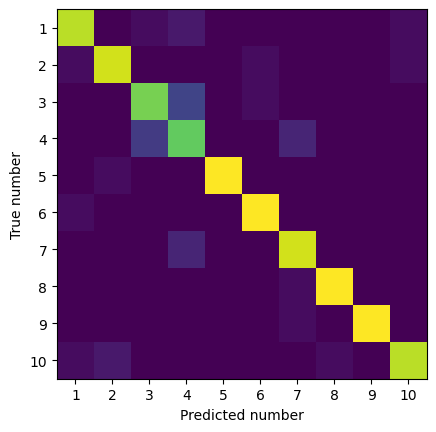

In [139]:
predicted_categories = y_hat.cpu().numpy()
actual_categories = y_test.cpu().numpy()

confusion = confusion_matrix(actual_categories, predicted_categories)
plt.figure()
plt.imshow(confusion)
tick_locs = np.arange(10)
ticks = ['{}'.format(i) for i in range(1, 11)]
plt.xticks(tick_locs, ticks)
plt.yticks(tick_locs, ticks)
plt.ylabel("True number")
plt.xlabel("Predicted number")
plt.show()